GitHub Repository link:
https://github.com/rozina-datascience/Brain-tumor-mri-classification

GitHub Profile link:
https://github.com/rozina-datascience


# ✅ Deliverables Summary

| Deliverable     | Description                                    |
| --------------- | ---------------------------------------------- |
| ✅ `.h5` models  | `best_custom_cnn.h5`, `best_transfer_model.h5` |
| ✅ Streamlit App | `app.py`                                       |
| ✅ Python Code   | All below steps                                |
| ✅ Evaluation    | Accuracy, loss, plots                          |
| ✅ GitHub        | Upload all code + README                       |
| ✅ Modular Code  | Well-commented & clean                         |


In [46]:
!pip install streamlit
!pip install tensorflow

In [4]:
import zipfile
import os

with zipfile.ZipFile("/content/archive.zip", 'r') as zip_ref:
    zip_ref.extractall("dataset")  # You can rename this if needed

# Check the folder structure
os.listdir("dataset")


['Testing', 'Training']

In [8]:
# Explore full structure
for root, dirs, files in os.walk("dataset"):
    print(root)


dataset
dataset/Testing
dataset/Testing/notumor
dataset/Testing/pituitary
dataset/Testing/meningioma
dataset/Testing/glioma
dataset/Training
dataset/Training/notumor
dataset/Training/pituitary
dataset/Training/meningioma
dataset/Training/glioma


In [13]:
import os

train_dir = 'dataset/Training'
test_dir = 'dataset/Testing'

for category in os.listdir(train_dir):
    print(f"{category}: {len(os.listdir(os.path.join(train_dir, category)))} training images")


notumor: 1595 training images
pituitary: 1457 training images
meningioma: 1339 training images
glioma: 1321 training images


In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image dimensions
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)


Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    BatchNormalization(),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    BatchNormalization(),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    BatchNormalization(),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 classes
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 111, 111, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 54, 54, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 26, 26, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,170,372 (42.61 MB)

 Trainable params: 11,169,924 (42.61 MB)

 Non-trainable params: 448 (1.75 KB)

In [16]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
output = Dense(4, activation='softmax')(x)

transfer_model = Model(inputs=base_model.input, outputs=output)
transfer_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
transfer_model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,263,108 (8.63 MB)

 Trainable params: 5,124 (20.02 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [18]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [
    EarlyStopping(patience=3, restore_best_weights=True),
    ModelCheckpoint('best_custom_cnn.h5', save_best_only=True)
]

cnn_history = cnn_model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=10,
    callbacks=callbacks
)

callbacks_transfer = [
    EarlyStopping(patience=3, restore_best_weights=True),
    ModelCheckpoint('best_transfer_model.h5', save_best_only=True)
]

transfer_history = transfer_model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=10,
    callbacks=callbacks_transfer
)


Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.5657 - loss: 0.9954

179/179 ━━━━━━━━━━━━━━━━━━━━ 880s 5s/step - accuracy: 0.5657 - loss: 0.9953 - val_accuracy: 0.7269 - val_loss: 0.7430
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 870s 5s/step - accuracy: 0.5637 - loss: 1.0671 - val_accuracy: 0.6651 - val_loss: 0.8222
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 876s 5s/step - accuracy: 0.5753 - loss: 0.9295 - val_accuracy: 0.7018 - val_loss: 0.8491
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 901s 5s/step - accuracy: 0.6042 - loss: 0.9822 - val_accuracy: 0.7201 - val_loss: 0.7918
Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8538 - loss: 0.3847

179/179 ━━━━━━━━━━━━━━━━━━━━ 395s 2s/step - accuracy: 0.8538 - loss: 0.3847 - val_accuracy: 0.8291 - val_loss: 0.4455
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 386s 2s/step - accuracy: 0.8783 - loss: 0.3313 - val_accuracy: 0.8276 - val_loss: 0.4533
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8834 - loss: 0.3164

179/179 ━━━━━━━━━━━━━━━━━━━━ 400s 2s/step - accuracy: 0.8834 - loss: 0.3164 - val_accuracy: 0.8421 - val_loss: 0.4212
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8932 - loss: 0.2932

179/179 ━━━━━━━━━━━━━━━━━━━━ 394s 2s/step - accuracy: 0.8932 - loss: 0.2932 - val_accuracy: 0.8543 - val_loss: 0.3878
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 390s 2s/step - accuracy: 0.8889 - loss: 0.2909 - val_accuracy: 0.8520 - val_loss: 0.3998
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9043 - loss: 0.2686

179/179 ━━━━━━━━━━━━━━━━━━━━ 403s 2s/step - accuracy: 0.9043 - loss: 0.2686 - val_accuracy: 0.8604 - val_loss: 0.3580
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 401s 2s/step - accuracy: 0.8917 - loss: 0.2941 - val_accuracy: 0.8604 - val_loss: 0.3777
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 389s 2s/step - accuracy: 0.9068 - loss: 0.2582 - val_accuracy: 0.8467 - val_loss: 0.4147
Epoch 9/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9028 - loss: 0.2535

179/179 ━━━━━━━━━━━━━━━━━━━━ 416s 2s/step - accuracy: 0.9028 - loss: 0.2536 - val_accuracy: 0.8871 - val_loss: 0.3097
Epoch 10/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 398s 2s/step - accuracy: 0.9032 - loss: 0.2645 - val_accuracy: 0.8581 - val_loss: 0.3918


In [19]:
cnn_loss, cnn_acc = cnn_model.evaluate(test_generator)
print(f"Custom CNN Accuracy: {cnn_acc:.2f}")

transfer_loss, transfer_acc = transfer_model.evaluate(test_generator)
print(f"Transfer Model Accuracy: {transfer_acc:.2f}")


41/41 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.7408 - loss: 0.7273
Custom CNN Accuracy: 0.73
41/41 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.8972 - loss: 0.2821
Transfer Model Accuracy: 0.89


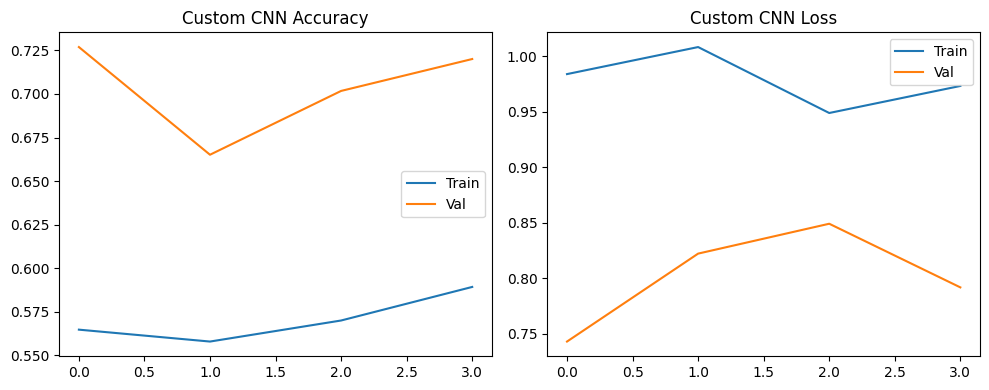

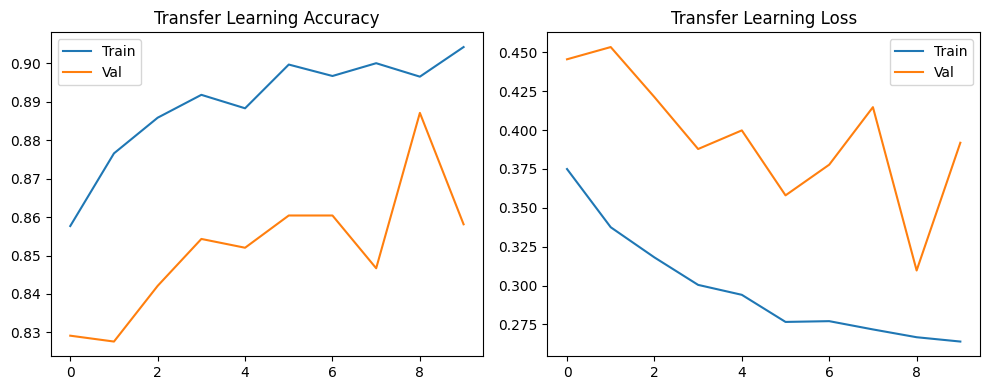

In [20]:
import matplotlib.pyplot as plt

def plot_history(history, title):
    plt.figure(figsize=(10, 4))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Val')
    plt.title(f'{title} Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Val')
    plt.title(f'{title} Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(cnn_history, "Custom CNN")
plot_history(transfer_history, "Transfer Learning")


In [23]:
# Save this in a file named `app.py`

import streamlit as st
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

model = load_model("best_transfer_model.h5")

classes = ['glioma', 'meningioma', 'notumor', 'pituitary']

st.title("🧠 Brain Tumor MRI Classifier")
uploaded = st.file_uploader("Upload an MRI image", type=["jpg", "jpeg", "png"])

if uploaded:
    img = image.load_img(uploaded, target_size=(224, 224))
    st.image(img, caption="Uploaded Image", use_column_width=True)

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0) / 255.0

    pred = model.predict(x)
    index = np.argmax(pred)
    confidence = pred[0][index]

    st.markdown(f"### 🩺 Prediction: **{classes[index]}**")
    st.markdown(f"Confidence: **{confidence:.2f}**")


2025-07-24 10:16:27.206 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-24 10:16:27.683 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-07-24 10:16:27.687 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-24 10:16:27.691 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-24 10:16:27.700 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-24 10:16:27.704 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-24 10:16:27.707 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-24 10:16:27.709 Thread 'MainThread': mi

In [31]:
import streamlit as st
import tensorflow as tf
from PIL import Image
import numpy as np

# Load the model (update filename as per your saved model)
model = tf.keras.models.load_model("best_custom_cnn.h5")

# Define class names as per your training data folders
class_names = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Set page config
st.set_page_config(page_title="Brain Tumor Classifier", layout="centered")

# Streamlit app header
st.title("🧠 Brain Tumor MRI Image Classifier")
st.write("Upload an MRI scan image to predict tumor type.")

# Upload image
uploaded_file = st.file_uploader("Choose an MRI image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    image = Image.open(uploaded_file).convert('RGB')
    st.image(image, caption="Uploaded MRI Image", use_column_width=True)

    # Preprocessing
    image = image.resize((150, 150))  # use your training image size
    img_array = np.array(image) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # shape: (1, 150, 150, 3)

    # Prediction
    prediction = model.predict(img_array)
    predicted_class = class_names[np.argmax(prediction)]

    # Display result
    st.success(f"🧠 Predicted Tumor Type: **{predicted_class.capitalize()}**")


2025-07-24 10:22:58.503 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-24 10:22:58.504 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-24 10:22:58.506 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-24 10:22:58.508 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-24 10:22:58.509 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-24 10:22:58.511 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-24 10:22:58.513 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-24 10:22:58.514 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [33]:
files.download('best_custom_cnn.h5')
files.download('best_transfer_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [34]:
requirements = """
streamlit
tensorflow
keras
Pillow
numpy
matplotlib
opencv-python
"""

with open("requirements.txt", "w") as f:
    f.write(requirements)



In [35]:
files.download("requirements.txt")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [43]:
code = """<# app.py

import streamlit as st
import tensorflow as tf
from PIL import Image
import numpy as np

# Page settings
st.set_page_config(page_title="Brain Tumor Classifier", layout="centered")

# Title
st.title("🧠 Brain Tumor MRI Image Classifier")
st.markdown("Upload a brain MRI image, and this app will classify it into one of the four tumor types.")

# Load the trained model
@st.cache_resource
def load_model():
    model = tf.keras.models.load_model("best_custom_cnn.h5")  # or "best_transfer_model.h5"
    return model

model = load_model()

# Define class names
class_names = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary']

# Upload image
uploaded_file = st.file_uploader("📁 Upload Brain MRI Image", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    # Display uploaded image
    image = Image.open(uploaded_file).convert("RGB")
    st.image(image, caption="🖼️ Uploaded Image", use_column_width=True)

    # Preprocess the image
    image = image.resize((150, 150))
    img_array = np.array(image) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Make prediction
    prediction = model.predict(img_array)
    predicted_class = class_names[np.argmax(prediction)]
    confidence = np.max(prediction) * 100

    # Display prediction
    st.success(f"🎯 Predicted Tumor Type: **{predicted_class.upper()}**")
    st.info(f"🔬 Confidence: **{confidence:.2f}%**")

else:
    st.warning("⚠️ st.warning("📂 Please upload a brain MRI image (JPG or PNG) to get started.")
.")
>"""

In [44]:
%%writefile app.py
import streamlit as st
import numpy as np
from PIL import Image
import tensorflow as tf

# Load the model
model = tf.keras.models.load_model('best_custom_cnn.h5')

# Class labels
class_names = ['glioma', 'meningioma', 'no_tumor', 'pituitary']

st.title("🧠 Brain Tumor MRI Classification")
st.write("Upload a brain MRI image to classify the tumor type.")

# Upload image
uploaded_file = st.file_uploader("Choose a brain MRI image", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    try:
        image = Image.open(uploaded_file).convert('RGB')
        st.image(image, caption='🖼️ Uploaded Image', use_column_width=True)

        image = image.resize((150, 150))
        img_array = np.array(image) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        prediction = model.predict(img_array)
        predicted_class = class_names[np.argmax(prediction)]
        confidence = np.max(prediction) * 100

        st.success(f"🎯 Predicted Tumor Type: **{predicted_class.upper()}**")
        st.info(f"🧪 Confidence: {confidence:.2f}%")
    except:
        st.warning("⚠️ Please upload a valid brain MRI image file.")
else:
    st.info("⬆️ Please upload an image file above.")


Overwriting app.py


In [37]:
code = '''
import streamlit as st
import tensorflow as tf
from PIL import Image
import numpy as np

# Set Streamlit page config
st.set_page_config(page_title="Brain Tumor Classifier", layout="centered")

# Title and description
st.title("🧠 Brain Tumor MRI Classifier")
st.write("Upload an MRI image to detect the type of brain tumor using a trained deep learning model.")

# Load the model (change the filename if using transfer model)
@st.cache_resource
def load_model():
    model = tf.keras.models.load_model("best_custom_cnn.h5")  # or best_transfer_model.h5
    return model

model = load_model()

# Define class labels (based on your training folders)
class_names = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Upload image
uploaded_file = st.file_uploader("📤 Upload an MRI scan", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    # Display the uploaded image
    image = Image.open(uploaded_file).convert('RGB')
    st.image(image, caption='🖼️ Uploaded Image', use_column_width=True)

    # Preprocess the image
    image = image.resize((150, 150))  # Resize to match model input
    img_array = np.array(image) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Shape: (1, 150, 150, 3)

    # Predict
    prediction = model.predict(img_array)
    predicted_class = class_names[np.argmax(prediction)]
    confidence = np.max(prediction) * 100

    # Show prediction
    st.success(f"🎯 Predicted Tumor Type: **{predicted_class.upper()}**")
    st.info(f"🧪 Confidence: {confidence:.2f}%")
else:
    st.warning("Please upload a brain MRI image to classify.")
'''


In [48]:
# Save it as app.py
with open("app.py", "w") as f:
    f.write(code)

In [49]:
# Download the file
from google.colab import files
files.download("app.py")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [50]:
import os
import shutil

# Create folders
os.makedirs("brain_tumor_project/models", exist_ok=True)

# Move files into the right locations
shutil.move("best_custom_cnn.h5", "brain_tumor_project/models/best_custom_cnn.h5")
shutil.move("app.py", "brain_tumor_project/app.py")
shutil.move("requirements.txt", "brain_tumor_project/requirements.txt")


'brain_tumor_project/requirements.txt'

In [51]:
code_files = {
    "data_processing.py": "# Code for loading and preprocessing the dataset\n\n# TODO: Add normalization, resizing, augmentation, etc.",
    "train_custom_cnn.py": "# Code for training your custom CNN model\n\n# TODO: Build model, compile, fit, save as best_custom_cnn.h5",
    "train_transfer.py": "# Code for training with Transfer Learning\n\n# TODO: Load pretrained model, fine-tune, save as best_transfer_model.h5",
    "evaluate.py": "# Code to evaluate models on test set\n\n# TODO: Evaluate using accuracy, confusion matrix, plots etc."
}

for filename, content in code_files.items():
    with open(f"brain_tumor_project/{filename}", "w") as f:
        f.write(content)


In [52]:
# Install necessary libraries (if not already installed)
!pip install tensorflow keras opencv-python matplotlib seaborn



In [53]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix


In [55]:
data_dir = "//content/brain_tumor_project"
categories = os.listdir(data_dir)
print("Classes:", categories)


Classes: ['train_custom_cnn.py', 'data_processing.py', 'app.py', 'evaluate.py', 'train_transfer.py', 'requirements.txt', 'models']


In [57]:
print("Image path:", img_path)
print("Files in folder:", os.listdir(img_path))


Image path: //content/brain_tumor_project/models
Files in folder: ['best_custom_cnn.h5']


In [60]:
img_path = "//content/brain_tumor_project/yes"


In [63]:
import os
print(os.listdir('/content'))




['.config', 'dataset', 'brain_tumor_project', 'best_transfer_model.h5', 'archive.zip', 'sample_data']


In [64]:
print(os.listdir('/content/dataset'))


['Testing', 'Training']


In [69]:
import os

for root, dirs, files in os.walk('/content/dataset'):
    print(f"\n📁 Folder: {root}")
    print(f"📂 Subfolders: {dirs}")
    print(f"🖼️ Files: {files}")



📁 Folder: /content/dataset
📂 Subfolders: ['Testing', 'Training']
🖼️ Files: []

📁 Folder: /content/dataset/Testing
📂 Subfolders: ['notumor', 'pituitary', 'meningioma', 'glioma']
🖼️ Files: []

📁 Folder: /content/dataset/Testing/notumor
📂 Subfolders: []
🖼️ Files: ['Te-no_0230.jpg', 'Te-no_0166.jpg', 'Te-no_0344.jpg', 'Te-no_0294.jpg', 'Te-no_0058.jpg', 'Te-no_0285.jpg', 'Te-no_0124.jpg', 'Te-no_0119.jpg', 'Te-no_0205.jpg', 'Te-no_0226.jpg', 'Te-no_0258.jpg', 'Te-no_0117.jpg', 'Te-no_0374.jpg', 'Te-no_0277.jpg', 'Te-no_0335.jpg', 'Te-no_0101.jpg', 'Te-no_0068.jpg', 'Te-no_0133.jpg', 'Te-no_0185.jpg', 'Te-no_0238.jpg', 'Te-no_0089.jpg', 'Te-no_0284.jpg', 'Te-no_0011.jpg', 'Te-no_0126.jpg', 'Te-no_0240.jpg', 'Te-no_0399.jpg', 'Te-no_0323.jpg', 'Te-no_0118.jpg', 'Te-no_0102.jpg', 'Te-no_0053.jpg', 'Te-no_0329.jpg', 'Te-no_0174.jpg', 'Te-no_0346.jpg', 'Te-no_0404.jpg', 'Te-no_0273.jpg', 'Te-no_0022.jpg', 'Te-no_0282.jpg', 'Te-no_0304.jpg', 'Te-no_0287.jpg', 'Te-no_0010.jpg', 'Te-no_0227.jpg',

In [72]:
img_path = '/content/dataset/'


In [73]:
img_path = '/content/dataset/'  # only if folder name is 'yes'
images = [f for f in os.listdir(img_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
print("Images found:", images)



Images found: []


In [74]:
images = [f for f in os.listdir(img_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]


In [76]:
st.title("🧠 Brain Tumor MRI Image Classifier")


2025-07-24 12:30:07.254 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-24 12:30:07.255 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-24 12:30:07.256 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [88]:
# app.py

import streamlit as st
import tensorflow as tf
from PIL import Image
import numpy as np

# Page settings
st.set_page_config(page_title="Brain Tumor Classifier", layout="centered")

# Title
st.title("🧠 Brain Tumor MRI Image Classifier")
st.markdown("Upload a brain MRI image, and this app will classify it into one of the four tumor types.")

# Load the trained model
@st.cache_resource
def load_model():
    model = tf.keras.models.load_model("best_custom_cnn.h5")  # or "best_transfer_model.h5"
    return model

model = load_model()

# Define class names
class_names = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary']

# Upload image
uploaded_file = st.file_uploader("📁 Upload Brain MRI Image", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    # Display uploaded image
    image = Image.open(uploaded_file).convert("RGB")
    st.image(image, caption="🖼️ Uploaded Image", use_column_width=True)

    # Preprocess the image
    image = image.resize((150, 150))
    img_array = np.array(image) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Make prediction
    prediction = model.predict(img_array)
    predicted_class = class_names[np.argmax(prediction)]
    confidence = np.max(prediction) * 100

    # Display prediction
    st.success(f"🎯 Predicted Tumor Type: **{predicted_class.upper()}**")
    st.info(f"🔬 Confidence: **{confidence:.2f}%**")

else:
    st.warning("⚠️ Please upload a brain MRI image (JPG or PNG) to get started.")

2025-07-24 12:35:13.007 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-24 12:35:13.009 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-24 12:35:13.010 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-24 12:35:13.010 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-24 12:35:13.012 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-24 12:35:13.013 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-24 12:35:13.014 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-24 12:35:13.016 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [89]:
app_code = """
import streamlit as st
import tensorflow as tf
from PIL import Image
import numpy as np

# Page settings
st.set_page_config(page_title="Brain Tumor Classifier", layout="centered")

# Title
st.title("Brain Tumor MRI Image Classifier")
st.markdown("Upload a brain MRI image, and this app will classify it into one of the four tumor types.")

# Load the trained model
@st.cache_resource
def load_model():
    model = tf.keras.models.load_model("best_custom_cnn.h5")  # or "best_transfer_model.h5"
    return model

model = load_model()

# Define class names
class_names = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary']

# Upload image
uploaded_file = st.file_uploader("Upload Brain MRI Image", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    # Display uploaded image
    image = Image.open(uploaded_file).convert("RGB")
    st.image(image, caption="Uploaded Image", use_column_width=True)

    # Preprocess the image
    image = image.resize((150, 150))
    img_array = np.array(image) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Make prediction
    prediction = model.predict(img_array)
    predicted_class = class_names[np.argmax(prediction)]
    confidence = np.max(prediction) * 100

    # Display prediction
    st.success(f"Predicted Tumor Type: **{predicted_class.upper()}**")
    st.info(f"Confidence: **{confidence:.2f}%**")

else:
    st.warning("Please upload a brain MRI image (JPG or PNG) to get started.")
"""


In [90]:
with open("app.py", "w") as file:
    file.write(app_code)


In [91]:
from google.colab import files
files.download("app.py")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Found 1311 images belonging to 4 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Evaluating model on test set...
41/41 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.8408 - loss: 0.4057

Test Accuracy: 88.71%
41/41 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step

Classification Report:
              precision    recall  f1-score   support

      glioma       0.94      0.83      0.88       300
  meningioma       0.81      0.74      0.77       306
     notumor       0.95      0.96      0.95       405
   pituitary       0.84      0.99      0.91       300

    accuracy                           0.89      1311
   macro avg       0.88      0.88      0.88      1311
weighted avg       0.89      0.89      0.89      1311



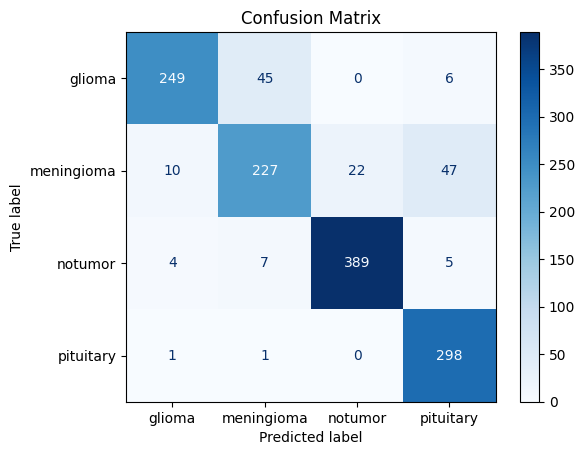

In [93]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set paths
test_dir = 'dataset/Testing'  # Corrected directory path
model_path = 'best_transfer_model.h5'  # Or best_custom_cnn.h5

# Load model
model = load_model(model_path)

# Image preprocessing
IMG_SIZE = (224, 224) # Corrected image size to match training
BATCH_SIZE = 32

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# Evaluate model
print("Evaluating model on test set...")
loss, accuracy = model.evaluate(test_generator)
print(f"\nTest Accuracy: {accuracy*100:.2f}%")

# Predict on test set
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [100]:
with open("app.py", "w") as file:
    file.write(app_code)



In [101]:
from google.colab import files
files.download("app.py")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [98]:
with open("evaluate.py", "w") as f:
    f.write(evaluate_code)


In [99]:
from google.colab import files
files.download("evaluate.py")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [95]:
evaluate_code = """
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set paths
test_dir = 'dataset/Testing'
model_path = 'best_transfer_model.h5'  # Or best_custom_cnn.h5

# Load model
model = load_model(model_path)

# Image preprocessing
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# Evaluate model
print("Evaluating model on test set...")
loss, accuracy = model.evaluate(test_generator)
print(f"\nTest Accuracy: {accuracy*100:.2f}%")

# Predict on test set
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()
"""

In [102]:
data_processing_code = '''import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def load_data(data_dir, img_size=(150, 150), batch_size=32):
    train_dir = os.path.join(data_dir, 'train')
    val_dir = os.path.join(data_dir, 'val')
    test_dir = os.path.join(data_dir, 'test')

    # Data augmentation for training set
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    # Rescaling only for validation and test
    val_test_datagen = ImageDataGenerator(rescale=1./255)

    # Data loaders
    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical'
    )

    val_generator = val_test_datagen.flow_from_directory(
        val_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical'
    )

    test_generator = val_test_datagen.flow_from_directory(
        test_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False
    )

    return train_generator, val_generator, test_generator
'''

# Save the code into a Python file
with open("dataprocessing.py", "w") as f:
    f.write(data_processing_code)


In [103]:
from google.colab import files
files.download('dataprocessing.py')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [106]:
pip install -r requirements.txt


In [108]:
requirements = """
streamlit
tensorflow
numpy
pillow
scikit-learn
matplotlib
"""

with open("requirements.txt", "w") as f:
    f.write(requirements.strip())


In [109]:
from google.colab import files
files.download("requirements.txt")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [112]:
files.download('//content/brain_tumor_project/models/best_custom_cnn.h5')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [113]:
model.save('best_custom_cnn.h5')


In [114]:
files.download('best_custom_cnn.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [115]:
from tensorflow.keras.models import load_model

model = load_model('best_custom_cnn.h5')
